In [3]:
from sklearn.datasets import make_circles 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.optimizers import SGD
from matplotlib import pyplot
import matplotlib.pyplot as plt

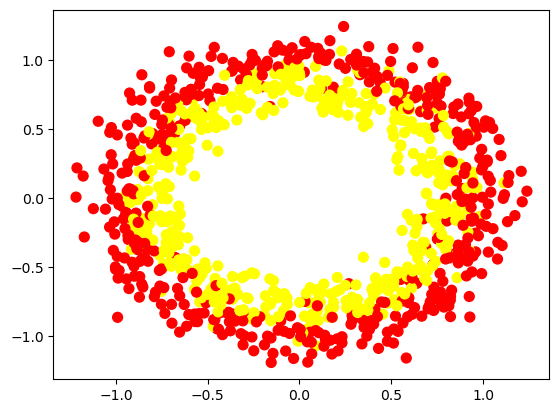

In [4]:
x,y=make_circles(n_samples=1000,noise=0.1,random_state=1)
plt.scatter(x[:,0],x[:,1],c=y,s=50,cmap='autumn')

In [5]:
n_train=500
trainX,testX=x[:n_train,:],x[n_train:,:] 
trainy,testy=y[:n_train],y[n_train:]

In [6]:
model=Sequential()
model.add(Dense(50,input_dim=2,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(1,activation='sigmoid'))
#optimizer
optm=SGD(learning_rate=0.01,momentum=0.9)
#compiler
model.compile(loss='binary_crossentropy', optimizer=optm,metrics=['accuracy'])

In [18]:
history=model.fit(trainX,trainy,validation_data=(testX,testy),epochs=100,verbose=2)

Epoch 1/100
16/16 - 1s - loss: 0.7467 - accuracy: 0.5320 - val_loss: 0.7063 - val_accuracy: 0.4860 - 942ms/epoch - 59ms/step
Epoch 2/100
16/16 - 0s - loss: 0.6924 - accuracy: 0.5000 - val_loss: 0.6854 - val_accuracy: 0.5220 - 95ms/epoch - 6ms/step
Epoch 3/100
16/16 - 0s - loss: 0.6881 - accuracy: 0.5620 - val_loss: 0.6864 - val_accuracy: 0.4940 - 97ms/epoch - 6ms/step
Epoch 4/100
16/16 - 0s - loss: 0.6753 - accuracy: 0.5100 - val_loss: 0.6794 - val_accuracy: 0.4980 - 85ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.6721 - accuracy: 0.5280 - val_loss: 0.6782 - val_accuracy: 0.5160 - 109ms/epoch - 7ms/step
Epoch 6/100
16/16 - 0s - loss: 0.6645 - accuracy: 0.5540 - val_loss: 0.6740 - val_accuracy: 0.5460 - 94ms/epoch - 6ms/step
Epoch 7/100
16/16 - 0s - loss: 0.6648 - accuracy: 0.5620 - val_loss: 0.6663 - val_accuracy: 0.5560 - 87ms/epoch - 5ms/step
Epoch 8/100
16/16 - 0s - loss: 0.6588 - accuracy: 0.6400 - val_loss: 0.6644 - val_accuracy: 0.6360 - 96ms/epoch - 6ms/step
Epoch 9/100
1

Epoch 67/100
16/16 - 0s - loss: 0.4593 - accuracy: 0.8180 - val_loss: 0.4485 - val_accuracy: 0.8500 - 82ms/epoch - 5ms/step
Epoch 68/100
16/16 - 0s - loss: 0.4555 - accuracy: 0.8320 - val_loss: 0.4457 - val_accuracy: 0.8400 - 96ms/epoch - 6ms/step
Epoch 69/100
16/16 - 0s - loss: 0.4530 - accuracy: 0.8340 - val_loss: 0.4453 - val_accuracy: 0.8380 - 98ms/epoch - 6ms/step
Epoch 70/100
16/16 - 0s - loss: 0.4515 - accuracy: 0.8220 - val_loss: 0.4443 - val_accuracy: 0.8440 - 96ms/epoch - 6ms/step
Epoch 71/100
16/16 - 0s - loss: 0.4487 - accuracy: 0.8200 - val_loss: 0.4362 - val_accuracy: 0.8400 - 109ms/epoch - 7ms/step
Epoch 72/100
16/16 - 0s - loss: 0.4440 - accuracy: 0.8260 - val_loss: 0.4344 - val_accuracy: 0.8500 - 124ms/epoch - 8ms/step
Epoch 73/100
16/16 - 0s - loss: 0.4422 - accuracy: 0.8300 - val_loss: 0.4335 - val_accuracy: 0.8480 - 114ms/epoch - 7ms/step
Epoch 74/100
16/16 - 0s - loss: 0.4414 - accuracy: 0.8180 - val_loss: 0.4286 - val_accuracy: 0.8460 - 108ms/epoch - 7ms/step
Epoc

In [7]:
_,train_acc=model.evaluate(trainX,trainy,verbose=1)
_,test_acc=model.evaluate(testX,testy,verbose=1)
print('Train Accuracy: \t',train_acc)
print()
print('Test Accuracy: \t',test_acc)

16/16 [==============================] - 0s 2ms/step - loss: 0.7478 - accuracy: 0.4820
Train Accuracy: 	 0.5120000243186951

Test Accuracy: 	 0.4819999933242798


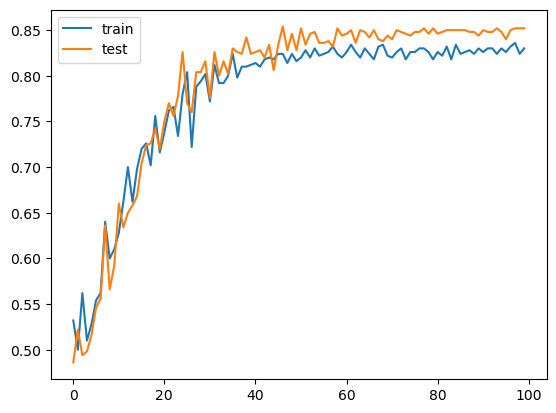

In [20]:
pyplot.plot(history.history['accuracy'],label='train')
pyplot.plot(history.history['val_accuracy'],label='test')
pyplot.legend()
pyplot.show()

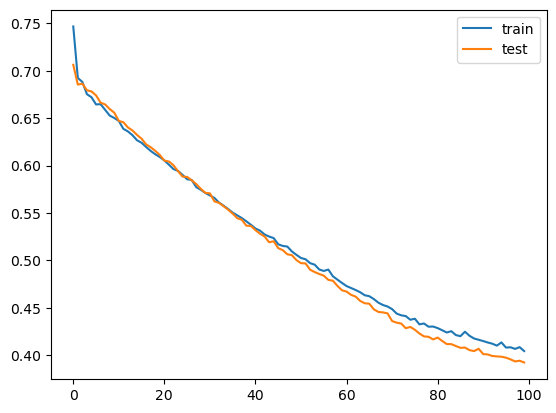

In [21]:
pyplot.plot(history.history['loss'],label='train')
pyplot.plot(history.history['val_loss'],label='test')
pyplot.legend()
pyplot.show()

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype("float32") / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the deep learning model with Batch Normalization
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.BatchNormalization())

model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dense(10, activation="softmax"))

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)






Epoch 1/5


750/750 [==============================] - 18s 21ms/step - loss: 0.1182 - accuracy: 0.9662 - val_loss: 0.0620 - val_accuracy: 0.9811
Epoch 2/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0401 - accuracy: 0.9879 - val_loss: 0.0501 - val_accuracy: 0.9853
Epoch 3/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0407 - val_accuracy: 0.9869
Epoch 4/5
750/750 [==============================] - 16s 21ms/step - loss: 0.0208 - accuracy: 0.9937 - val_loss: 0.0357 - val_accuracy: 0.9884
Epoch 5/5
313/313 [==============================] - 3s 8ms/step - loss: 0.0304 - accuracy: 0.9911
Test accuracy: 0.991100013256073


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Load and preprocess your dataset (replace this with your dataset loading code)
# X_train, y_train, X_test, y_test = ...

# Define the model-building function
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(trainX.shape[1],)))
    
    # Tune the number of hidden layers and units in each layer
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(layers.Dense(units=hp.Int(f"units_{i}", min_value=32, max_value=512, step=32),
                               activation="relu"))
    
    # Add the output layer
    model.add(layers.Dense(10, activation="softmax"))

    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])

    return model

# Instantiate the tuner and perform the hyperparameter search
tuner = RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,  # Adjust as needed
    executions_per_trial=1,
    directory="my_tuner_dir",
    project_name="my_tuner_project"
)

tuner.search(trainX,trainy, epochs=5, validation_data=(testX,testy))

# Get the best model and print the summary
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()


Trial 5 Complete [00h 00m 02s]
val_accuracy: 0.4959999918937683

Best val_accuracy So Far: 0.6700000166893005
Total elapsed time: 00h 00m 11s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 288)               864       
                                                                 
 dense_1 (Dense)             (None, 32)                9248      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 11498 (44.91 KB)
Trainable param